In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ast

In [5]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('portfolio_optimization_results.csv')
# Convert the 'Optimized_b' column from strings to lists of floats
df['Optimized_b'] = df['Optimized_b'].apply(lambda x: np.fromstring(x[1:-1], sep=', '))

# Multiply the expected returns by 100
df['Optimized_Returns'] *= 100
# Multiply the minimum variance by 100 squared
df['Minimum_Variance'] *= 100**2
# Calculate the standard deviation from the variance
df['Standard_Deviation'] = np.sqrt(df['Minimum_Variance'])

# round up
df['Optimized_b'] = df['Optimized_b'].apply(lambda x: np.round(x, 4))

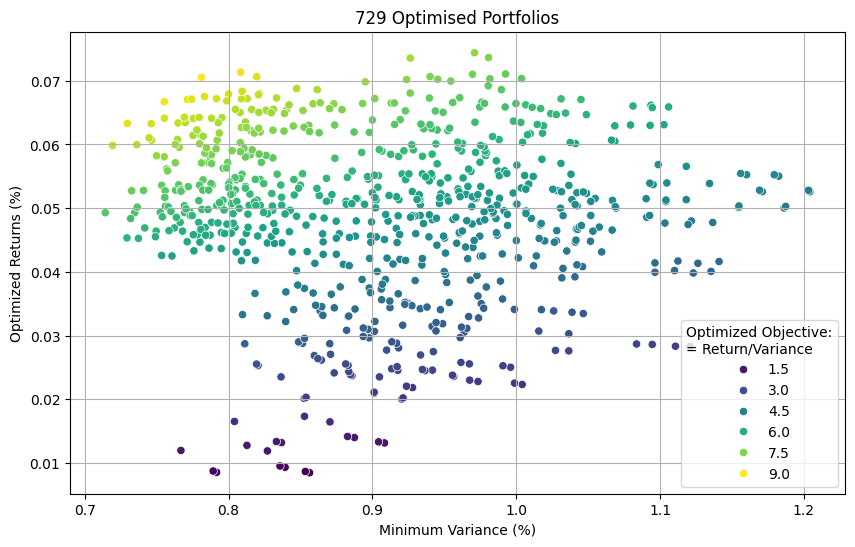

In [6]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Minimum_Variance', y='Optimized_Returns', hue='Optimized_Objective', palette='viridis', legend='brief')
plt.xlabel('Minimum Variance (%)')
plt.ylabel('Optimized Returns (%)')
plt.title('729 Optimised Portfolios')
plt.grid(True)
plt.legend(title='Optimized Objective:\n= Return/Variance')
plt.show()


In [7]:
# Get the portfolio with the highest optimized objective value
best_portfolio_by_objective = df.loc[df['Optimized_Objective'].idxmax()]
# Get the portfolio with the highest optimized returns
best_portfolio_by_returns = df.loc[df['Optimized_Returns'].idxmax()]
# Get the portfolio with the lowest minimum variance
best_portfolio_by_variance = df.loc[df['Minimum_Variance'].idxmin()]

print("Best Portfolio by Optimized Objective Value:")
print(best_portfolio_by_objective)

print("\nBest Portfolio by Optimized Returns:")
print(best_portfolio_by_returns)

print("\nBest Portfolio by Minimum Variance:")
print(best_portfolio_by_variance)

Best Portfolio by Optimized Objective Value:
Combination            ('SUN', 'BWP', 'CPU', 'VEA', 'CSL', 'GNC')
Optimized_b                [0.2169, 0.1, 0.2462, 0.237, 0.1, 0.1]
Optimized_Objective                                      9.030287
Optimized_Returns                                        0.070545
Minimum_Variance                                         0.781207
Standard_Deviation                                       0.883859
Name: 16, dtype: object

Best Portfolio by Optimized Returns:
Combination            ('SUN', 'GPT', 'WTC', 'VEA', 'CSL', 'GNC')
Optimized_b                  [0.3238, 0.1, 0.1, 0.2762, 0.1, 0.1]
Optimized_Objective                                      7.663281
Optimized_Returns                                        0.074413
Minimum_Variance                                         0.971039
Standard_Deviation                                       0.985413
Name: 151, dtype: object

Best Portfolio by Minimum Variance:
Combination            ('SUN', 'BWP', '

In [8]:
# Obtain the optimised obj portfolio
portfolio_combination = list(
    ast.literal_eval(best_portfolio_by_objective['Combination'])
)
portfolio_weights = list(best_portfolio_by_objective['Optimized_b'])
# Compute the log return
stock_returns = pd.read_csv('stock_log_returns.csv', index_col='Date')
stock_returns.index = pd.to_datetime(stock_returns.index)
portfolio_return = np.dot(stock_returns[portfolio_combination].values, portfolio_weights)
portfolio_return = pd.DataFrame(portfolio_return, index=stock_returns.index, columns=['Portfolio Return'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_23836\162264669.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_returns.index = pd.to_datetime(stock_returns.index)


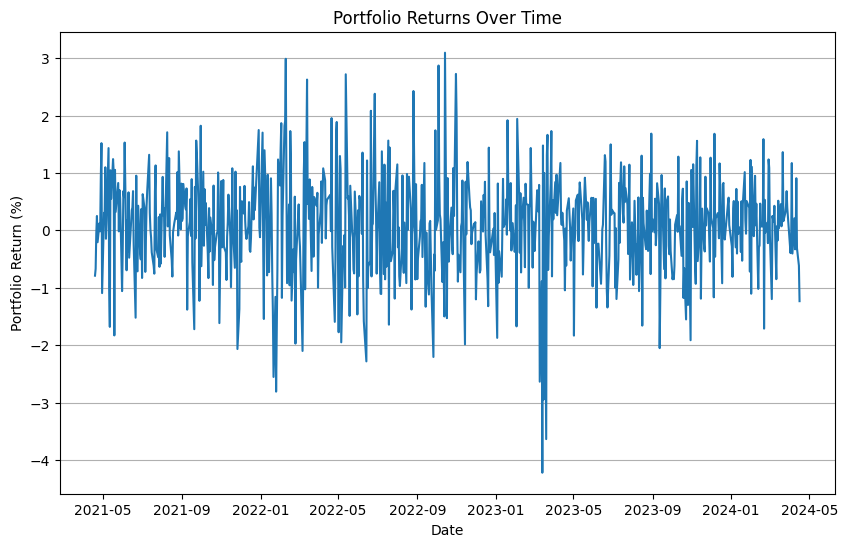

In [9]:
# Plot the portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_return.index, portfolio_return['Portfolio Return']*100, linestyle='-')
# sns.lineplot(data=portfolio_return, palette='viridis', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Portfolio Return (%)')
plt.title('Portfolio Returns Over Time')
plt.grid(True, axis='y')
plt.show()

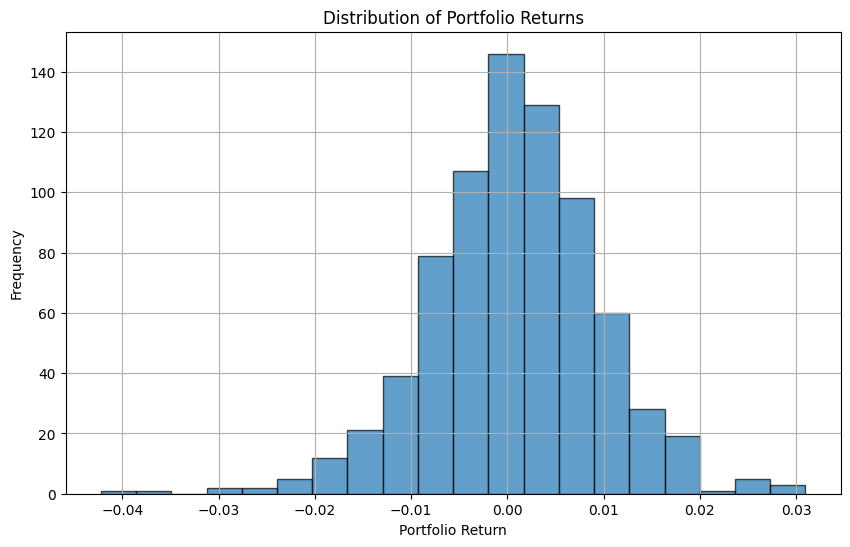

In [10]:
# Plot a histogram of the portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_return['Portfolio Return'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Portfolio Return')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Returns')
plt.grid(True)
plt.show()

In [11]:
portfolio_return_pct = portfolio_return * 100

# Get descriptive statistics for the portfolio returns DataFrame
portfolio_stats = portfolio_return_pct.describe()

# Calculate skewness and kurtosis
skewness = portfolio_return_pct.skew()
kurtosis = portfolio_return_pct.kurtosis()

# Add skewness and kurtosis to the statistics DataFrame
portfolio_stats.loc['Skewness'] = skewness
portfolio_stats.loc['Ex_Kurtosis'] = kurtosis

print("Descriptive Statistics for Portfolio Returns:")
print(portfolio_stats)

Descriptive Statistics for Portfolio Returns:
             Portfolio Return
count              758.000000
mean                 0.070554
std                  0.883955
min                 -4.223034
25%                 -0.438652
50%                  0.088226
75%                  0.587185
max                  3.095865
Skewness            -0.246769
Ex_Kurtosis          1.529352


In [12]:
scipy.stats.skew(portfolio_return_pct['Portfolio Return'].dropna(), bias=False)
scipy.stats.kurtosis(portfolio_return_pct['Portfolio Return'].dropna(), fisher=False)

4.511376952967116